# Kunskapskontroll SQL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine

In [2]:
engine = create_engine('mssql://CAMILLASLENOVO/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server')
connection = engine.connect()

## 1. SQL code used in data analysis

In [3]:
# Personal information about AdventureWorks employees. Name, gender, age, jobtitle, pay rate.

query_1 = """
SELECT 
    Employee.BusinessEntityID AS 'Business Entity ID',
	CONCAT(Person.FirstName, ' ', Person.LastName) AS 'Full Name',
    Employee.Gender,
    Employee.BirthDate AS 'Birth Date',
    Employee.JobTitle AS 'Job Title',
    Employee.HireDate AS 'Hire Date',
    Employee.VacationHours AS 'Vacation Hours',
    Employee.SickLeaveHours AS 'Sick Leave Hours',
    Pay.Rate, 
    Pay.ModifiedDate
FROM HumanResources.Employee AS Employee
INNER JOIN Person.Person AS Person ON Employee.BusinessEntityID = Person.BusinessEntityID
INNER JOIN HumanResources.EmployeePayHistory AS Pay ON Employee.BusinessEntityID = Pay.BusinessEntityID
WHERE Pay.ModifiedDate = (
    SELECT MAX(ModifiedDate) 
    FROM HumanResources.EmployeePayHistory 
    WHERE BusinessEntityID = Employee.BusinessEntityID
)
ORDER BY Employee.BusinessEntityID
"""
pd.read_sql(query_1, con=connection)

,Business Entity ID,Full Name,Gender,Birth Date,Job Title,Hire Date,Vacation Hours,Sick Leave Hours,Rate,ModifiedDate
0,1,Ken Sánchez,M,1969-01-29,Chief Executive Officer,2009-01-14,99,69,125.5000,2014-06-30
1,2,Terri Duffy,F,1971-08-01,Vice President of Engineering,2008-01-31,1,20,63.4615,2014-06-30
2,3,Roberto Tamburello,M,1974-11-12,Engineering Manager,2007-11-11,2,21,43.2692,2014-06-30
3,4,Rob Walters,M,1974-12-23,Senior Tool Designer,2007-12-05,48,80,29.8462,2011-12-01
4,5,Gail Erickson,F,1952-09-27,Design Engineer,2008-01-06,5,22,32.6923,2014-06-30
...,...,...,...,...,...,...,...,...,...,...
285,286,Lynn Tsoflias,F,1977-02-14,Sales Representative,2013-05-30,36,38,23.0769,2014-06-30
286,287,Amy Alberts,F,1957-09-20,European Sales Manager,2012-04-16,21,30,48.1010,2014-06-30
287,288,Rachel Valdez,F,1975-07-09,Sales Representative,2013-05-30,35,37,23.0769,2014-06-30
288,289,Jae Pak,F,1968-03-17,Sales Representative,2012-05-30,37,38,23.0769,2014-06-30


In [4]:
# Statistics regarding age, sick leave hours, and vacation hours distributed by gender.

query_2 = """
SELECT 
    CASE WHEN Employee.Gender = 'M' THEN 'Male' ELSE 'Female' END AS Gender,
    COUNT(DISTINCT Employee.BusinessEntityID) AS 'Gender Count',
    MAX(DATEDIFF(YEAR, Employee.BirthDate, GETDATE())) AS 'Oldest',
    MIN(DATEDIFF(YEAR, Employee.BirthDate, GETDATE())) AS 'Youngest',
    AVG(DATEDIFF(YEAR, Employee.BirthDate, GETDATE())) AS 'Average Age',
    MAX(Employee.SickLeaveHours) AS 'Highest Sick Leave Hours',
    MIN(Employee.SickLeaveHours) AS 'Lowest Sick Leave Hours',
    AVG(Employee.SickLeaveHours * 1.0) AS 'Average Sick Leave Hours',
    MAX(Employee.VacationHours) AS 'Highest Vacation Hours',
    MIN(Employee.VacationHours) AS 'Lowest Vacation Hours',
    AVG(Employee.VacationHours * 1.0) AS 'Average Vacation Hours'
FROM 
    HumanResources.Employee AS Employee
INNER JOIN 
    Person.Person AS Person ON Employee.BusinessEntityID = Person.BusinessEntityID
INNER JOIN 
    HumanResources.EmployeePayHistory AS Pay ON Employee.BusinessEntityID = Pay.BusinessEntityID
WHERE Employee.Gender IN ('M', 'F')
GROUP BY 
    CASE WHEN Employee.Gender = 'M' THEN 'Male' ELSE 'Female' END
"""
pd.read_sql(query_2, con=connection)

,Gender,Gender Count,Oldest,Youngest,Average Age,Highest Sick Leave Hours,Lowest Sick Leave Hours,Average Sick Leave Hours,Highest Vacation Hours,Lowest Vacation Hours,Average Vacation Hours
0,Female,84,72,33,46,69,20,45.136363,99,0,50.829545
1,Male,206,73,33,45,80,20,44.469298,99,0,48.144736


In [5]:
# AdventureWorks diffrent products with names, descriptions and ratings and comments from customers.

query_3 = """
SELECT 
    P.ProductID AS 'ProductID',
    P.Name AS 'Product Name',
    PD.Description AS 'Product Description',
    PR.Rating AS 'Rating by customers',
    PR.Comments AS 'Comments from customers'
FROM 
    Production.Product AS P
LEFT JOIN 
    Production.ProductModelProductDescriptionCulture AS PMPD ON P.ProductModelID = PMPD.ProductModelID
LEFT JOIN 
    Production.ProductDescription AS PD ON PMPD.ProductDescriptionID = PD.ProductDescriptionID
LEFT JOIN 
    Production.ProductReview AS PR ON P.ProductID = PR.ProductID
WHERE 
    PMPD.CultureID = 'en' OR PMPD.CultureID IS NULL
ORDER BY 
    CASE 
        WHEN PR.Rating IS NULL THEN 1 
        ELSE 0
    END,
    PR.Rating DESC,
    PD.Description DESC; 
"""
pd.read_sql(query_3, con=connection)

,ProductID,Product Name,Product Description,Rating by customers,Comments from customers
0,798,"Road-550-W Yellow, 40",Same technology as all of our Road series bike...,5.0,The Road-550-W from Adventure Works Cycles is ...
1,709,"Mountain Bike Socks, M",Combination of natural and synthetic fibers st...,5.0,I can't believe I'm singing the praises of a p...
2,937,HL Mountain Pedal,Stainless steel; designed to shed mud easily.,4.0,"A little on the heavy side, but overall the en..."
3,937,HL Mountain Pedal,Stainless steel; designed to shed mud easily.,2.0,Maybe it's just because I'm new to mountain bi...
4,843,Cable Lock,"Wraps to fit front and rear tires, carrier and...",NaN,None
...,...,...,...,...,...
500,319,HL Crankarm,None,NaN,None
501,320,Chainring Bolts,None,NaN,None
502,321,Chainring Nut,None,NaN,None
503,322,Chainring,None,NaN,None


In [6]:
# Information about Adventure Works online customers. Name, which country they come from, number of orders and the 
# total cost (product, tax and freight and displayed in dollar) for their orders between 2011-2014.

query_4 = """
SELECT 
    SC.CustomerID AS 'Customer ID',
	PP.FirstName AS 'First Name',
    PP.LastName  AS 'Last Name',
    PCR.Name AS 'Country',
    SUM(SSH.TotalDue) AS 'Total Cost For Customer',
	COUNT(DISTINCT SSH.SalesOrderID) AS 'Number Of Orders'
FROM 
    Person.Person AS PP
INNER JOIN 
    Person.BusinessEntityAddress AS PBEA ON PP.BusinessEntityID = PBEA.BusinessEntityID
INNER JOIN 
    Person.Address AS PA ON PBEA.AddressID = PA.AddressID
INNER JOIN 
    Person.StateProvince AS PS ON PA.StateProvinceID = PS.StateProvinceID
INNER JOIN 
    Person.CountryRegion AS PCR ON PS.CountryRegionCode = PCR.CountryRegionCode
INNER JOIN 
    Sales.Customer AS SC ON PP.BusinessEntityID = SC.PersonID
INNER JOIN 
    Sales.SalesOrderHeader AS SSH ON SC.CustomerID = SSH.CustomerID
GROUP BY 
    PP.FirstName,
    PP.LastName,
    PCR.Name,
    SC.CustomerID,
    SC.PersonID
ORDER BY 
    'Total Cost For Customer' DESC;
"""
pd.read_sql(query_4, con=connection)

,Customer ID,First Name,Last Name,Country,Total Cost For Customer,Number Of Orders
0,12301,Nichole,Nara,France,14691.3950,5
1,12132,Kaitlyn,Henderson,France,14690.1686,5
2,12308,Margaret,He,France,14662.5435,5
3,12131,Randall,Dominguez,France,14658.9191,5
4,12300,Adriana,Gonzalez,France,14633.1836,5
...,...,...,...,...,...,...
18479,28300,Abigail,Bennett,United States,2.5305,1
18480,28094,Melanie,Peterson,United States,2.5305,1
18481,28968,Marcus,Morgan,United States,2.5305,1
18482,28016,Cody,Sanders,United States,2.5305,1


In [7]:
# Statistics countrywise for online customers. Country, number of customers and purchase amount. Results between 2011-2014.

query_5 = """
WITH CountryWiseCustomerStats AS (
    SELECT 
        PCR.Name AS 'Country',
        SC.CustomerID,
        SUM(SSH.TotalDue) AS 'Total Purchase',
        DENSE_RANK() OVER (PARTITION BY PCR.Name ORDER BY SUM(SSH.TotalDue) ASC) AS 'LowestPurchaseRank',
        DENSE_RANK() OVER (PARTITION BY PCR.Name ORDER BY SUM(SSH.TotalDue) DESC) AS 'HighestPurchaseRank'
    FROM 
        Person.Person AS PP
    INNER JOIN 
        Person.BusinessEntityAddress AS PBEA ON PP.BusinessEntityID = PBEA.BusinessEntityID
    INNER JOIN 
        Person.Address AS PA ON PBEA.AddressID = PA.AddressID
    INNER JOIN 
        Person.StateProvince AS PS ON PA.StateProvinceID = PS.StateProvinceID
    INNER JOIN 
        Person.CountryRegion AS PCR ON PS.CountryRegionCode = PCR.CountryRegionCode
    INNER JOIN 
        Sales.Customer AS SC ON PP.BusinessEntityID = SC.PersonID
    INNER JOIN 
        Sales.SalesOrderHeader AS SSH ON SC.CustomerID = SSH.CustomerID
    GROUP BY 
        PCR.Name, SC.CustomerID
)
SELECT 
    Country,
    COUNT(DISTINCT CustomerID) AS 'Number of Customers',
    MAX(CASE WHEN [HighestPurchaseRank] = 1 THEN [Total Purchase] END) AS 'Highest Purchase Amount',
    MAX(CASE WHEN [LowestPurchaseRank] = 1 THEN [Total Purchase] END) AS 'Lowest Purchase Amount',
	SUM([Total Purchase]) / COUNT(DISTINCT CustomerID) AS 'Average Purchase Amount per Customer'
FROM 
    CountryWiseCustomerStats
GROUP BY 
    Country
ORDER BY 
    Country;
"""
pd.read_sql(query_5, con=connection)

,Country,Number of Customers,Highest Purchase Amount,Lowest Purchase Amount,Average Purchase Amount per Customer
0,Australia,3591,9193.0587,4.4090,2788.1943
1,Canada,1571,6696.8526,5.5140,1391.1640
2,France,1810,14691.3950,4.4090,1614.1655
3,Germany,1780,11691.2869,4.4090,1796.7501
4,United Kingdom,1913,9348.5764,4.4090,1959.1437
5,United States,7819,7481.5131,2.5305,1329.8932


In [8]:
# Statistics countrywise for online customers in Europe. Number of orders and total due per year. The 
# total due is displayed in dollars.

query_6 = """
WITH CustomerOrdersByCountryAndDate AS (
    SELECT
        CONCAT(PP.FirstName, ' ', PP.LastName) AS Customer, 
        PCR.Name AS Country,
        SC.CustomerID AS [Customer ID],
        SSH.SubTotal AS [Sub Total],
        SSH.TaxAmt AS [Tax Amount],
        SSH.Freight,
        SSH.TotalDue AS [Total Due],
        SSH.SalesOrderID AS [Sales Order ID],
        SSH.OrderDate AS OrderDate,
        ROW_NUMBER() OVER (PARTITION BY PCR.Name ORDER BY SSH.OrderDate) AS RowNum
    FROM 
        Person.Person AS PP
    INNER JOIN 
        Person.BusinessEntityAddress AS PBEA ON PP.BusinessEntityID = PBEA.BusinessEntityID
    INNER JOIN 
        Person.Address AS PA ON PBEA.AddressID = PA.AddressID
    INNER JOIN 
        Person.StateProvince AS PS ON PA.StateProvinceID = PS.StateProvinceID
    INNER JOIN 
        Person.CountryRegion AS PCR ON PS.CountryRegionCode = PCR.CountryRegionCode
    INNER JOIN 
        Sales.Customer AS SC ON PP.BusinessEntityID = SC.PersonID
    INNER JOIN 
        Sales.SalesOrderHeader AS SSH ON SC.CustomerID = SSH.CustomerID
    WHERE 
        PCR.Name IN ('Germany', 'United Kingdom', 'France')
),
TotalDuePerYear AS (
    SELECT
        Country,
        YEAR(OrderDate) AS [Order Year],
        SUM([Total Due]) AS [Total Due Per Year],
        COUNT([Sales Order ID]) AS [Number of Orders]
    FROM 
        CustomerOrdersByCountryAndDate
    GROUP BY 
        Country,
        YEAR(OrderDate)
)

SELECT *
FROM TotalDuePerYear
ORDER BY 
    CASE 
        WHEN Country = 'Germany' THEN 0
        WHEN Country = 'United Kingdom' THEN 1
        WHEN Country = 'France' THEN 2
    END,
    [Order Year];
"""
pd.read_sql(query_6, con=connection)

,Country,Order Year,Total Due Per Year,Number of Orders
0,Germany,2011,2.727809e+05,81
1,Germany,2012,6.078282e+05,249
2,Germany,2013,1.305778e+06,1142
3,Germany,2014,1.011828e+06,1012
4,United Kingdom,2011,4.009919e+05,117
5,United Kingdom,2012,6.431462e+05,278
6,United Kingdom,2013,1.546690e+06,1429
7,United Kingdom,2014,1.157013e+06,1207
8,France,2011,2.362686e+05,70
9,France,2012,5.772765e+05,244


In [9]:
# The most ordered products in the European countries. Top 5.

query_7 = """
SELECT 
    Country,
    ProductID,
    [Product Name],
    [Total Quantity Sold]
FROM (
    SELECT 
        Terr.Name AS 'Country',
        PP.ProductID,
        PP.Name AS 'Product Name',
        SUM(SOD.OrderQty) AS 'Total Quantity Sold',
        ROW_NUMBER() OVER(PARTITION BY Terr.Name ORDER BY SUM(SOD.OrderQty) DESC) AS RowNum
    FROM 
        Sales.SalesOrderHeader AS SSH
    LEFT JOIN 
        Sales.SalesOrderDetail AS SOD ON SSH.SalesOrderID = SOD.SalesOrderID
    LEFT JOIN 
        Sales.SalesTerritory AS Terr ON SSH.TerritoryID = Terr.TerritoryID
    LEFT JOIN 
        Production.Product AS PP ON SOD.ProductID = PP.ProductID
    WHERE 
        Terr.Name IN ('United Kingdom', 'Germany', 'France')
    GROUP BY 
        Terr.Name, SOD.ProductID, PP.ProductID, PP.Name
) AS RankedProducts
WHERE 
    RowNum <= 5
ORDER BY 
    Country, [Total Quantity Sold] DESC;
"""
pd.read_sql(query_7, con=connection)

,Country,ProductID,Product Name,Total Quantity Sold
0,France,712,AWC Logo Cap,587
1,France,870,Water Bottle - 30 oz.,568
2,France,711,"Sport-100 Helmet, Blue",519
3,France,707,"Sport-100 Helmet, Red",503
4,France,708,"Sport-100 Helmet, Black",499
5,Germany,870,Water Bottle - 30 oz.,677
6,Germany,712,AWC Logo Cap,555
7,Germany,708,"Sport-100 Helmet, Black",415
8,Germany,707,"Sport-100 Helmet, Red",412
9,Germany,711,"Sport-100 Helmet, Blue",410


In [10]:
# Total sales profit per year in the European country. The sales profit is displayed in dollars.

query_8 = """
SELECT 
    Terr.Name AS 'Country',
    YEAR(SSH.OrderDate) AS 'Year',
    SUM(SOD.LineTotal - Hist.StandardCost * SOD.OrderQty) AS 'Total Sales Profit Per Year'
FROM 
    Sales.SalesOrderHeader AS SSH
LEFT JOIN 
    Sales.SalesOrderDetail AS SOD ON SSH.SalesOrderID = SOD.SalesOrderID
LEFT JOIN 
    Production.ProductCostHistory AS Hist ON SOD.ProductID = Hist.ProductID 
    AND Hist.StartDate = (
        SELECT MAX(StartDate) FROM Production.ProductCostHistory
        WHERE ProductID = Hist.ProductID 
        AND StartDate <= SSH.OrderDate
    )
LEFT JOIN 
    Sales.SalesTerritory AS Terr ON SSH.TerritoryID = Terr.TerritoryID
WHERE 
    Terr.Name IN ('United Kingdom', 'Germany', 'France')
GROUP BY 
    Terr.Name, YEAR(SSH.OrderDate)
ORDER BY 
    Terr.Name, YEAR(SSH.OrderDate)
"""
pd.read_sql(query_8, con=connection)

,Country,Year,Total Sales Profit Per Year
0,France,2011,85859.837000
1,France,2012,246361.110535
2,France,2013,389953.564716
3,France,2014,326780.603375
4,Germany,2011,99326.162400
5,Germany,2012,221690.451300
6,Germany,2013,386210.099604
7,Germany,2014,375304.726781
8,United Kingdom,2011,146048.274200
9,United Kingdom,2012,289784.780384


In [11]:
# Number of orders with a specific sales reason. Only Europe.

query_9 = """
SELECT 
    SR.SalesReasonID AS 'Sales ReasonID', 
    SR.Name AS 'Sale reason',
    YEAR(SOH.OrderDate) AS 'Order Year',
    ST.Name AS 'Country', 
    COUNT(SOH.SalesOrderID) AS 'Total Number of Sales Orders'
FROM 
    Sales.SalesReason AS SR
LEFT JOIN 
    Sales.SalesOrderHeaderSalesReason AS SOHSR ON SR.SalesReasonID = SOHSR.SalesReasonID
LEFT JOIN 
    Sales.SalesOrderHeader AS SOH ON SOHSR.SalesOrderID = SOH.SalesOrderID
LEFT JOIN 
    Sales.SalesTerritory AS ST ON SOH.TerritoryID = ST.TerritoryID
WHERE 
    ST.Name IN ('Germany', 'United Kingdom', 'France')
GROUP BY 
    SR.SalesReasonID, SR.Name, YEAR(SOH.OrderDate), ST.Name
ORDER BY 
    COUNT(SOH.SalesOrderID) DESC;
"""
pd.read_sql(query_9, con=connection)

,Sales ReasonID,Sale reason,Order Year,Country,Total Number of Sales Orders
0,1,Price,2013,United Kingdom,1026
1,1,Price,2014,United Kingdom,965
2,1,Price,2014,Germany,802
3,1,Price,2014,France,798
4,1,Price,2013,Germany,789
5,1,Price,2013,France,782
6,2,On Promotion,2013,United Kingdom,223
7,2,On Promotion,2013,Germany,183
8,2,On Promotion,2013,France,177
9,2,On Promotion,2014,United Kingdom,155


## 2. Python code used in data analysis

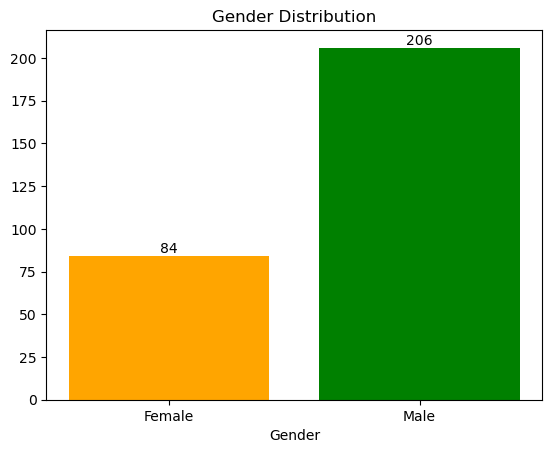

In [12]:
# Bar chart to clearly show the difference in the number of employees who are men vs. women.

data = pd.read_sql(query_2, con=connection)

fig, ax = plt.subplots()

bar_colors = ['green' if gender == 'Male' else 'orange' for gender in data['Gender']]
bars = ax.bar(data['Gender'], data['Gender Count'], color=bar_colors)

#The count above each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

ax.set_xlabel('Gender')
ax.set_ylabel('')
ax.set_title('Gender Distribution')

plt.show()

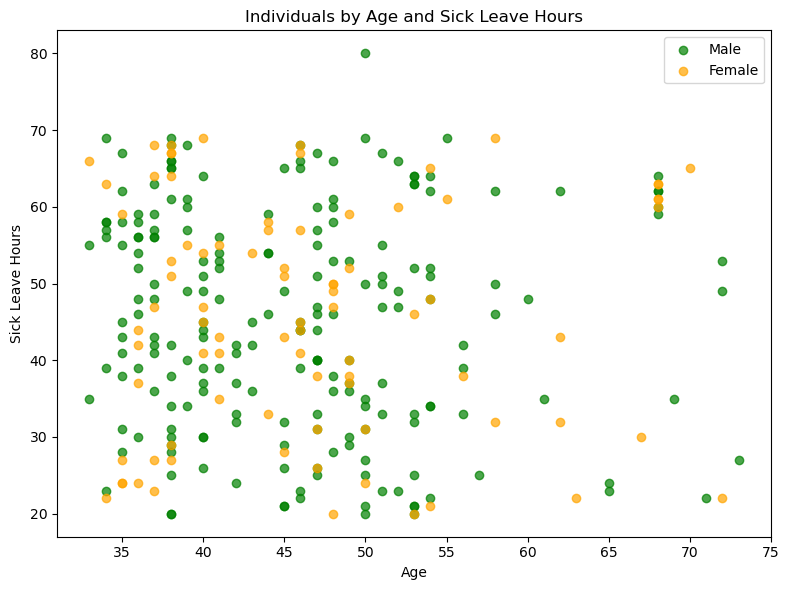

In [13]:
# Scatter plot to attempt to visualize patterns regarding age, gender distribution vs. sick leave hours.
# However, it turned out in the documentation that it referred not to sick leave but to available sick days.

data = pd.read_sql(query_1, con=connection)

# Calculating the age for each individual since the data we have is in the form of birth dates and not the age."
data['Birth Date'] = pd.to_datetime(data['Birth Date'])
data['Age'] = pd.Timestamp.now().year - data['Birth Date'].dt.year

gender_labels = {'M': 'Male', 'F': 'Female'}

# Plotting each unique individual with their respective age and sick hours, using different colors based on gender.
plt.figure(figsize=(8, 6))
for gender, color in zip(['M', 'F'], ['green', 'orange']):
    gender_data = data[data['Gender'] == gender]
    plt.scatter(gender_data['Age'], gender_data['Sick Leave Hours'], color=color, alpha=0.7, label=gender_labels[gender])

plt.ylabel('Sick Leave Hours')
plt.xlabel('Age')
plt.title('Individuals by Age and Sick Leave Hours')
plt.legend()
plt.tight_layout()
plt.show()

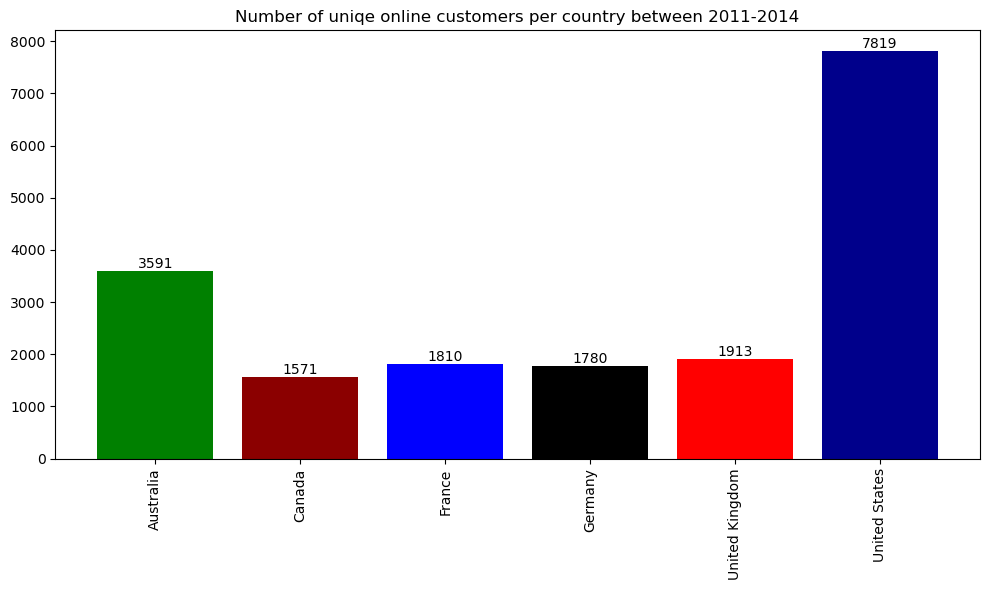

In [14]:
# Number of uniqe online customers per country between 2011-2014.

data = pd.read_sql(query_5, con=connection)


custom_colors = ['green', 'darkred', 'blue', 'black', 'red', 'darkblue']


plt.figure(figsize=(10, 6))
bars = plt.bar(data['Country'], data['Number of Customers'], color=custom_colors[:len(data)])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')


plt.xlabel('')
plt.ylabel('')
plt.title('Number of uniqe online customers per country between 2011-2014')
plt.xticks(rotation=90) 
plt.tight_layout()  
plt.show()

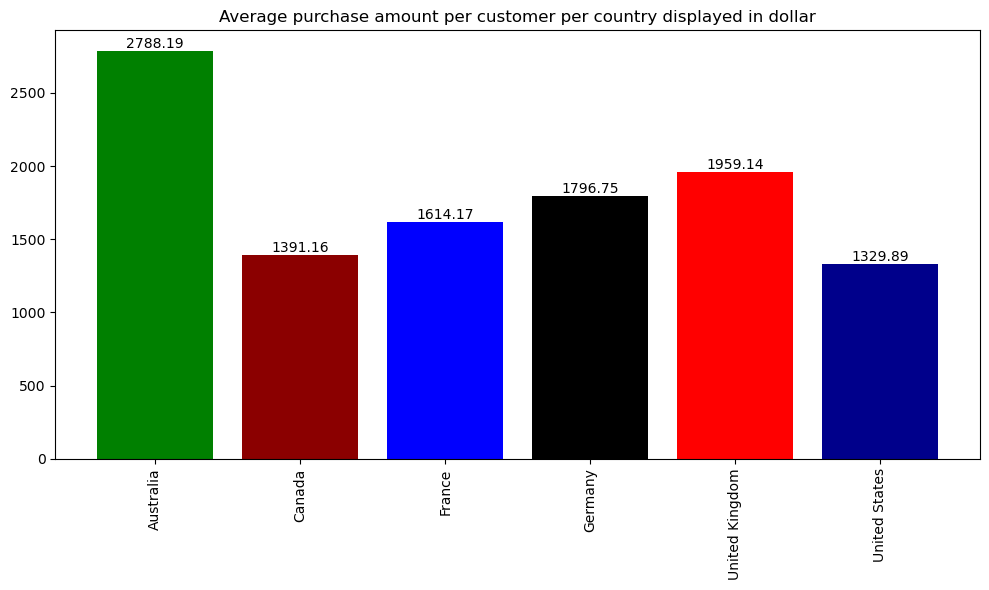

In [15]:
# Barplot to show Average purchase amount per customer per country displayed in dollar.

data = pd.read_sql(query_5, con=connection)

custom_colors = ['green', 'darkred', 'blue', 'black', 'red', 'darkblue']

plt.figure(figsize=(10, 6))
bars = plt.bar(data['Country'], data['Average Purchase Amount per Customer'], color=custom_colors[:len(data)])


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.xlabel('')
plt.ylabel('')
plt.title('Average purchase amount per customer per country displayed in dollar')
plt.xticks(rotation=90) 
plt.tight_layout()  
plt.show()

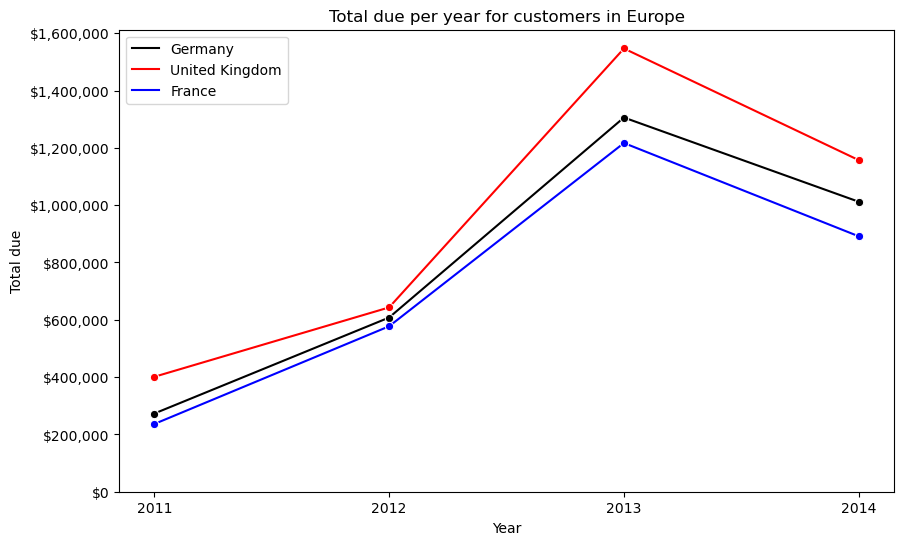

In [16]:
# Graph to display Total due per year for customers in Europe

data = pd.read_sql(query_6, con=connection)

plt.figure(figsize=(10, 6))
sns.lineplot(
    x='Order Year', 
    y='Total Due Per Year', 
    hue='Country', 
    data=data, 
    palette={'Germany': 'black', 'United Kingdom': 'red', 'France': 'blue'}, 
    marker='o'
)

plt.title('Total due per year for customers in Europe')
plt.xlabel('Year')
plt.ylabel('Total due')

plt.ylim(bottom=0)  
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)  

plt.xticks(data['Order Year'].unique())

plt.grid(False)
plt.legend()
plt.show()

In [17]:
# Selected the European countries to display the number of unique customers and the average purchase amount per customer.

data = pd.read_sql(query_5, con=connection)


selected_countries = ['France', 'Germany', 'United Kingdom']
filtered_data = data[data['Country'].isin(selected_countries)]

result_table = filtered_data[['Country', 'Number of Customers', 'Average Purchase Amount per Customer']]

print(result_table)

          Country  Number of Customers  Average Purchase Amount per Customer
2          France                 1810                             1614.1655
3         Germany                 1780                             1796.7501
4  United Kingdom                 1913                             1959.1437


In [18]:
# Calculation of confidence intervals for the average purchase amount per customer for the European countries.

data = pd.read_sql(query_5, con=connection)

selected_countries = ['France', 'Germany', 'United Kingdom']
filtered_data = data[data['Country'].isin(selected_countries)]

average_purchase_amounts = filtered_data['Average Purchase Amount per Customer']
confidence_interval = stats.norm.interval(0.95, loc=np.mean(average_purchase_amounts), scale=stats.sem(average_purchase_amounts))

print(f"Confidence interval for average purchase amount per customer for France, Germany, and United Kingdom: {confidence_interval}")

Confidence interval for average purchase amount per customer for France, Germany, and United Kingdom: (1594.722156407963, 1985.317376925371)


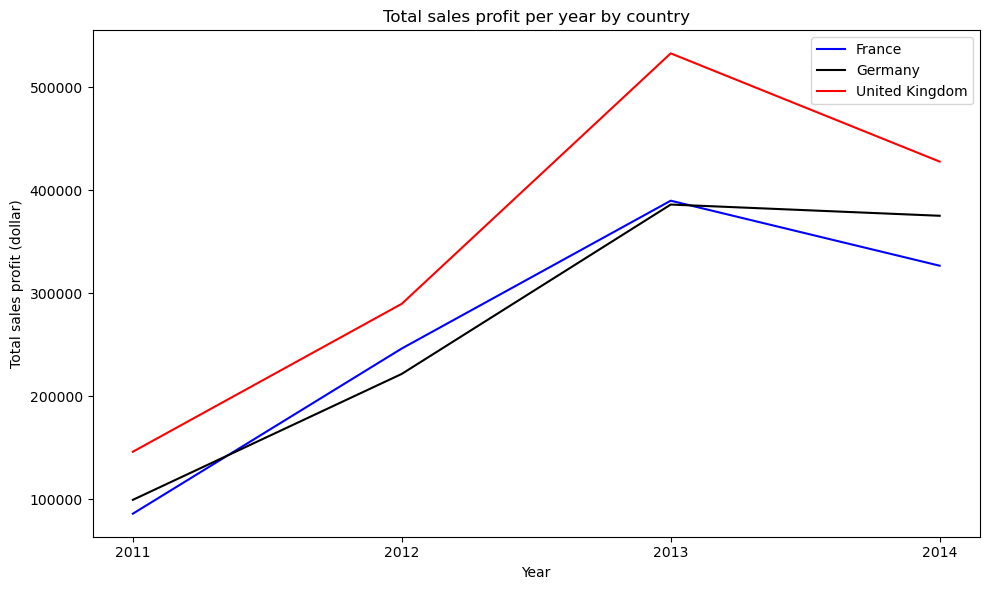

In [19]:
# Chart to illustrate total sales profit per year distributed across the countries in Europe. Displayed in dollar.

data = pd.read_sql(query_8, con=connection)


plt.figure(figsize=(10, 6))

for country, color in zip(['France', 'Germany', 'United Kingdom'], ['blue', 'black', 'red']):
    country_data = data[data['Country'] == country]
    plt.plot(country_data['Year'], country_data['Total Sales Profit Per Year'], label=country, color=color)

plt.title('Total sales profit per year by country')
plt.xlabel('Year')
plt.ylabel('Total sales profit (dollar)')
plt.legend()
plt.grid(False) 
plt.xticks(data['Year'].unique())
plt.tight_layout()
plt.show()